/tmp/ipykernel_45258/439298851.py:80: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


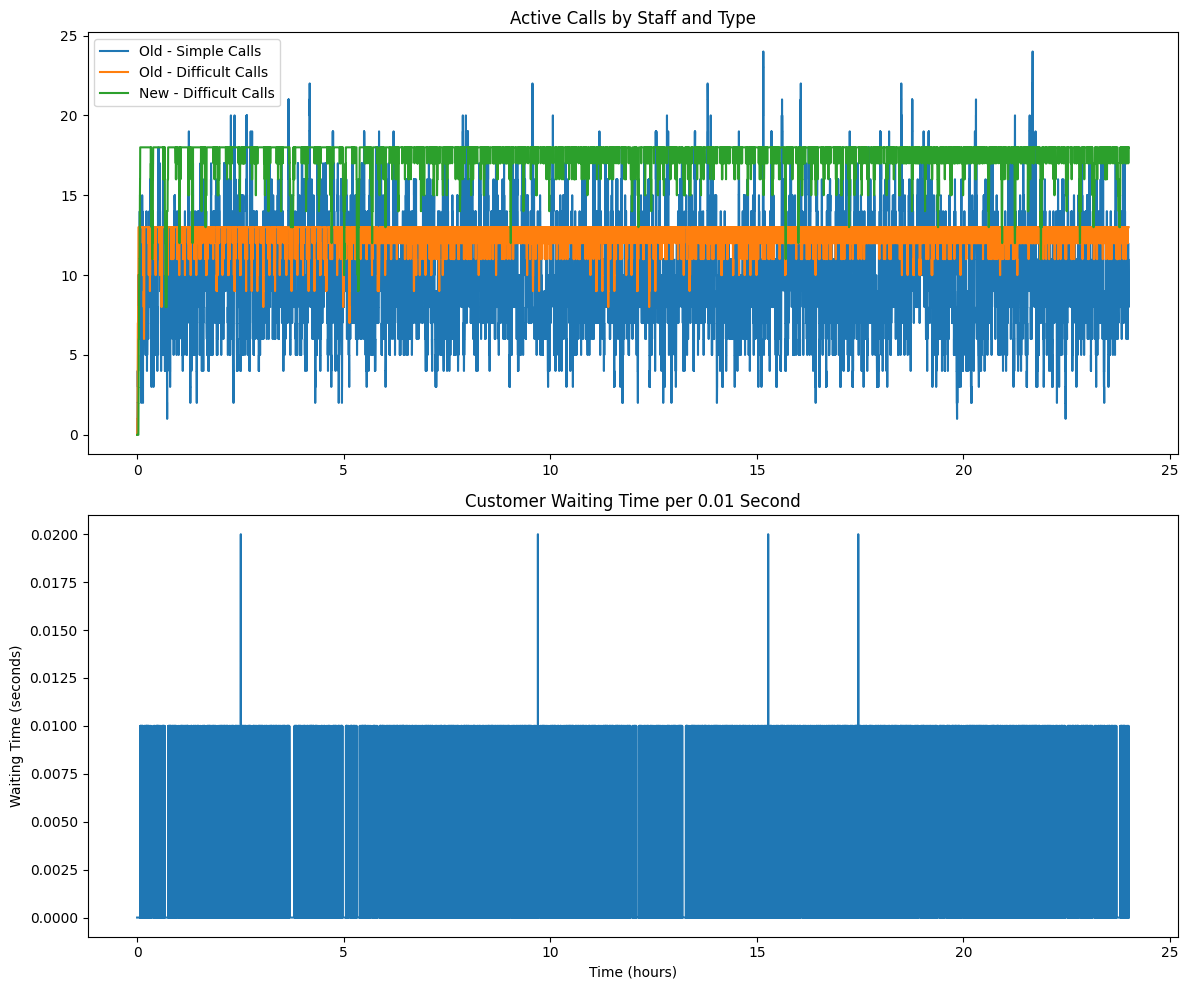

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Simulation parameters
hours = 24  # Duration of simulation in hours
milliseconds = hours * 3600 * 100  # Total number of 0.01-second intervals in the simulation
calls_per_hour = 1000  # Average number of calls per hour
lambda_poisson = calls_per_hour / (3600 * 100)  # Average number of calls per 0.01 second

# Call type probabilities and service times in milliseconds
prob_simple = 0.6
prob_difficult = 0.4
time_simple_old = 6000  # Old staff simple call duration (6000 intervals of 0.01s each)
time_difficult_old = 48000  # Old staff difficult call duration
time_difficult_new = 108000  # New staff difficult call duration

# Staff counts
num_old = 60
num_new = 90

# Initialize lists to track active calls and their completion times
old_simple_calls = []
old_difficult_calls = []
new_difficult_calls = []

# Initialize arrays to record active calls per 0.01-second interval
old_simple_active = np.zeros(milliseconds)
old_difficult_active = np.zeros(milliseconds)
new_difficult_active = np.zeros(milliseconds)
waiting_times = np.zeros(milliseconds)

# Generate call arrivals using a Poisson distribution
call_arrivals = poisson.rvs(mu=lambda_poisson, size=milliseconds)

# Simulation loop
for millisecond in range(milliseconds):
    # Update call completion
    old_simple_calls = [call - 1 for call in old_simple_calls if call > 1]
    old_difficult_calls = [call - 1 for call in old_difficult_calls if call > 1]
    new_difficult_calls = [call - 1 for call in new_difficult_calls if call > 1]

    # Record the number of active calls
    old_simple_active[millisecond] = len(old_simple_calls)
    old_difficult_active[millisecond] = len(old_difficult_calls)
    new_difficult_active[millisecond] = len(new_difficult_calls)

    # Process new calls
    for _ in range(call_arrivals[millisecond]):
        if np.random.random() < prob_simple:
            if len(old_simple_calls) < num_old * 0.6:
                old_simple_calls.append(time_simple_old)
            else:
                waiting_times[millisecond] += 0.01  # Increment waiting times by the simulation interval
        else:
            if len(old_difficult_calls) < num_old * 0.21:
                old_difficult_calls.append(time_difficult_old)
            elif len(new_difficult_calls) < num_new * 0.19:
                new_difficult_calls.append(time_difficult_new)
            else:
                waiting_times[millisecond] += 0.01  # Increment waiting times by the simulation interval

# Convert milliseconds to hours for plotting
time_hours = np.linspace(0, hours, milliseconds)

# Plotting results
fig, axs = plt.subplots(2, 1, figsize=(12, 10))
axs[0].plot(time_hours, old_simple_active, label="Old - Simple Calls")
axs[0].plot(time_hours, old_difficult_active, label="Old - Difficult Calls")
axs[0].plot(time_hours, new_difficult_active, label="New - Difficult Calls")
axs[0].set_title("Active Calls by Staff and Type")
axs[0].legend()

axs[1].plot(time_hours, waiting_times)
axs[1].set_title("Customer Waiting Time per 0.01 Second")
axs[1].set_xlabel("Time (hours)")
axs[1].set_ylabel("Waiting Time (seconds)")
axs[1].yaxis.set_major_locator(plt.MaxNLocator(integer=True))  # Ensure Y-axis ticks are integers

plt.tight_layout()
plt.show()
